# **Data Mining : Homework 6**

#### Elaheh Toulabi Nejad   |   9631243
---



## **1. Linear Regression** 


### **a)**

In [1]:
import pandas as pd
import numpy as np

In [2]:
nulls = ['0']
rawdf = pd.read_csv('Camera.csv',sep=';',na_values=nulls)
print(rawdf.shape)
rawdf.head(3)


(1038, 13)


,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,NaN,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,NaN,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,NaN,NaN,45.0,45.0,NaN,NaN,2.0,NaN,NaN,179.0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
دیتاست را با مقادیر نال 0 و جداکننده ; یمخوانیم.</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">



### **b)**

### ***Missing Values :***

In [3]:
rawdf.isnull().sum()

Model                        0
Release date                 0
Max resolution               1
Low resolution              54
Effective pixels            35
Zoom wide (W)               85
Zoom tele (T)               85
Normal focus range         137
Macro focus range          128
Storage included           125
Weight (inc. batteries)     23
Dimensions                  16
Price                        0
dtype: int64

In [4]:
rawdf['Max resolution'].fillna(rawdf['Max resolution'].mode()[0],inplace=True)
rawdf['Low resolution'].fillna(rawdf['Low resolution'].mode()[0],inplace=True)
rawdf['Effective pixels'].fillna(rawdf['Effective pixels'].mode()[0],inplace=True)
rawdf['Zoom wide (W)'].fillna(rawdf['Zoom wide (W)'].mode()[0],inplace=True)
rawdf['Zoom tele (T)'].fillna(rawdf['Zoom tele (T)'].mode()[0],inplace=True)
rawdf['Normal focus range'].fillna(rawdf['Normal focus range'].mode()[0],inplace=True)
rawdf['Macro focus range'].fillna(rawdf['Macro focus range'].mode()[0],inplace=True)
rawdf['Storage included'].fillna(rawdf['Storage included'].mode()[0],inplace=True)
rawdf['Weight (inc. batteries)'].fillna(rawdf['Weight (inc. batteries)'].mode()[0],inplace=True)
rawdf['Dimensions'].fillna(rawdf['Dimensions'].mode()[0],inplace=True)

In [5]:
print(rawdf.isnull().sum())
rawdf.head(3)


Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64


,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,3.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,10.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,2048.0,3.0,45.0,45.0,50.0,10.0,2.0,320.0,90.0,179.0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


<p style =" direction:rtl;text-align:right;">
به جای مقادیر نال مد ا=آن ستون را قراد داده ایم چون برای اغلب ستون ها اینطور به نظر می رسد که بین یک دسته از مقادیر مقدار گرفته اند و اعداد پیوسته طبیعی نیستند.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### ***Normalization :***

In [6]:
from scipy import stats

In [7]:
dfz = pd.DataFrame(stats.zscore(rawdf[['Release date','Max resolution',
                                       'Low resolution','Effective pixels',
                                       'Zoom wide (W)','Zoom tele (T)',
                                       'Normal focus range','Macro focus range',
                                       'Storage included','Weight (inc. batteries)',
                                       'Dimensions']],axis=0),
                   columns=['Release date','Max resolution',
                                       'Low resolution','Effective pixels',
                                       'Zoom wide (W)','Zoom tele (T)',
                                       'Normal focus range','Macro focus range',
                                       'Storage included','Weight (inc. batteries)',
                                       'Dimensions'])
dfz['Price']=rawdf[['Price']]
dfz.head(3)

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,-2.419937,-1.924133,-1.722601,-0.622159,0.606067,-0.195553,1.138526,4.098318,-0.575169,0.368263,-0.550837,179.0
1,-2.052755,-1.585273,-1.722601,-1.355191,0.606067,-0.195553,-0.044033,0.130477,-0.575169,0.368263,2.454328,179.0
2,-1.318390,-2.432424,0.232628,-0.622159,2.810112,-0.995845,-0.044033,0.130477,-0.650153,-0.022429,-0.789342,179.0


In [8]:
len(rawdf['Model'].unique())


1038

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


<p style =" direction:rtl;text-align:right;">
مقدار فیچر ها را به کمک zscore نرمال کرده ایم و model برای هر رکورد مقدار یکتایی دارد و مانند index عمل می کند ان را بی اثر درنظر گرفته و حذف می کنیم.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### **c)**
### ***Outliers :***

In [9]:
cols = ['Release date','Max resolution','Low resolution','Effective pixels',
        'Zoom wide (W)','Zoom tele (T)','Normal focus range','Macro focus range',
        'Storage included','Weight (inc. batteries)','Dimensions']
masked = dfz[~((dfz[cols]>3) | (dfz[cols] <-3))].notna()
masked['Price']=True
dfz=dfz[masked].dropna()
dfz.shape

(940, 12)

In [10]:

dfz.head(3)

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
1,-2.052755,-1.585273,-1.722601,-1.355191,0.606067,-0.195553,-0.044033,0.130477,-0.575169,0.368263,2.454328,179.0
2,-1.318390,-2.432424,0.232628,-0.622159,2.810112,-0.995845,-0.044033,0.130477,-0.650153,-0.022429,-0.789342,179.0
3,-1.685572,-1.754703,-1.722601,-0.622159,-0.338524,-1.111829,-0.044033,0.130477,-0.575169,-0.022429,-0.789342,269.0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


<p style =" direction:rtl;text-align:right;">
به کمک نتایج حاصل از zscore و +-3 داده های پرت را حذف می کنیم
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### **d)**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

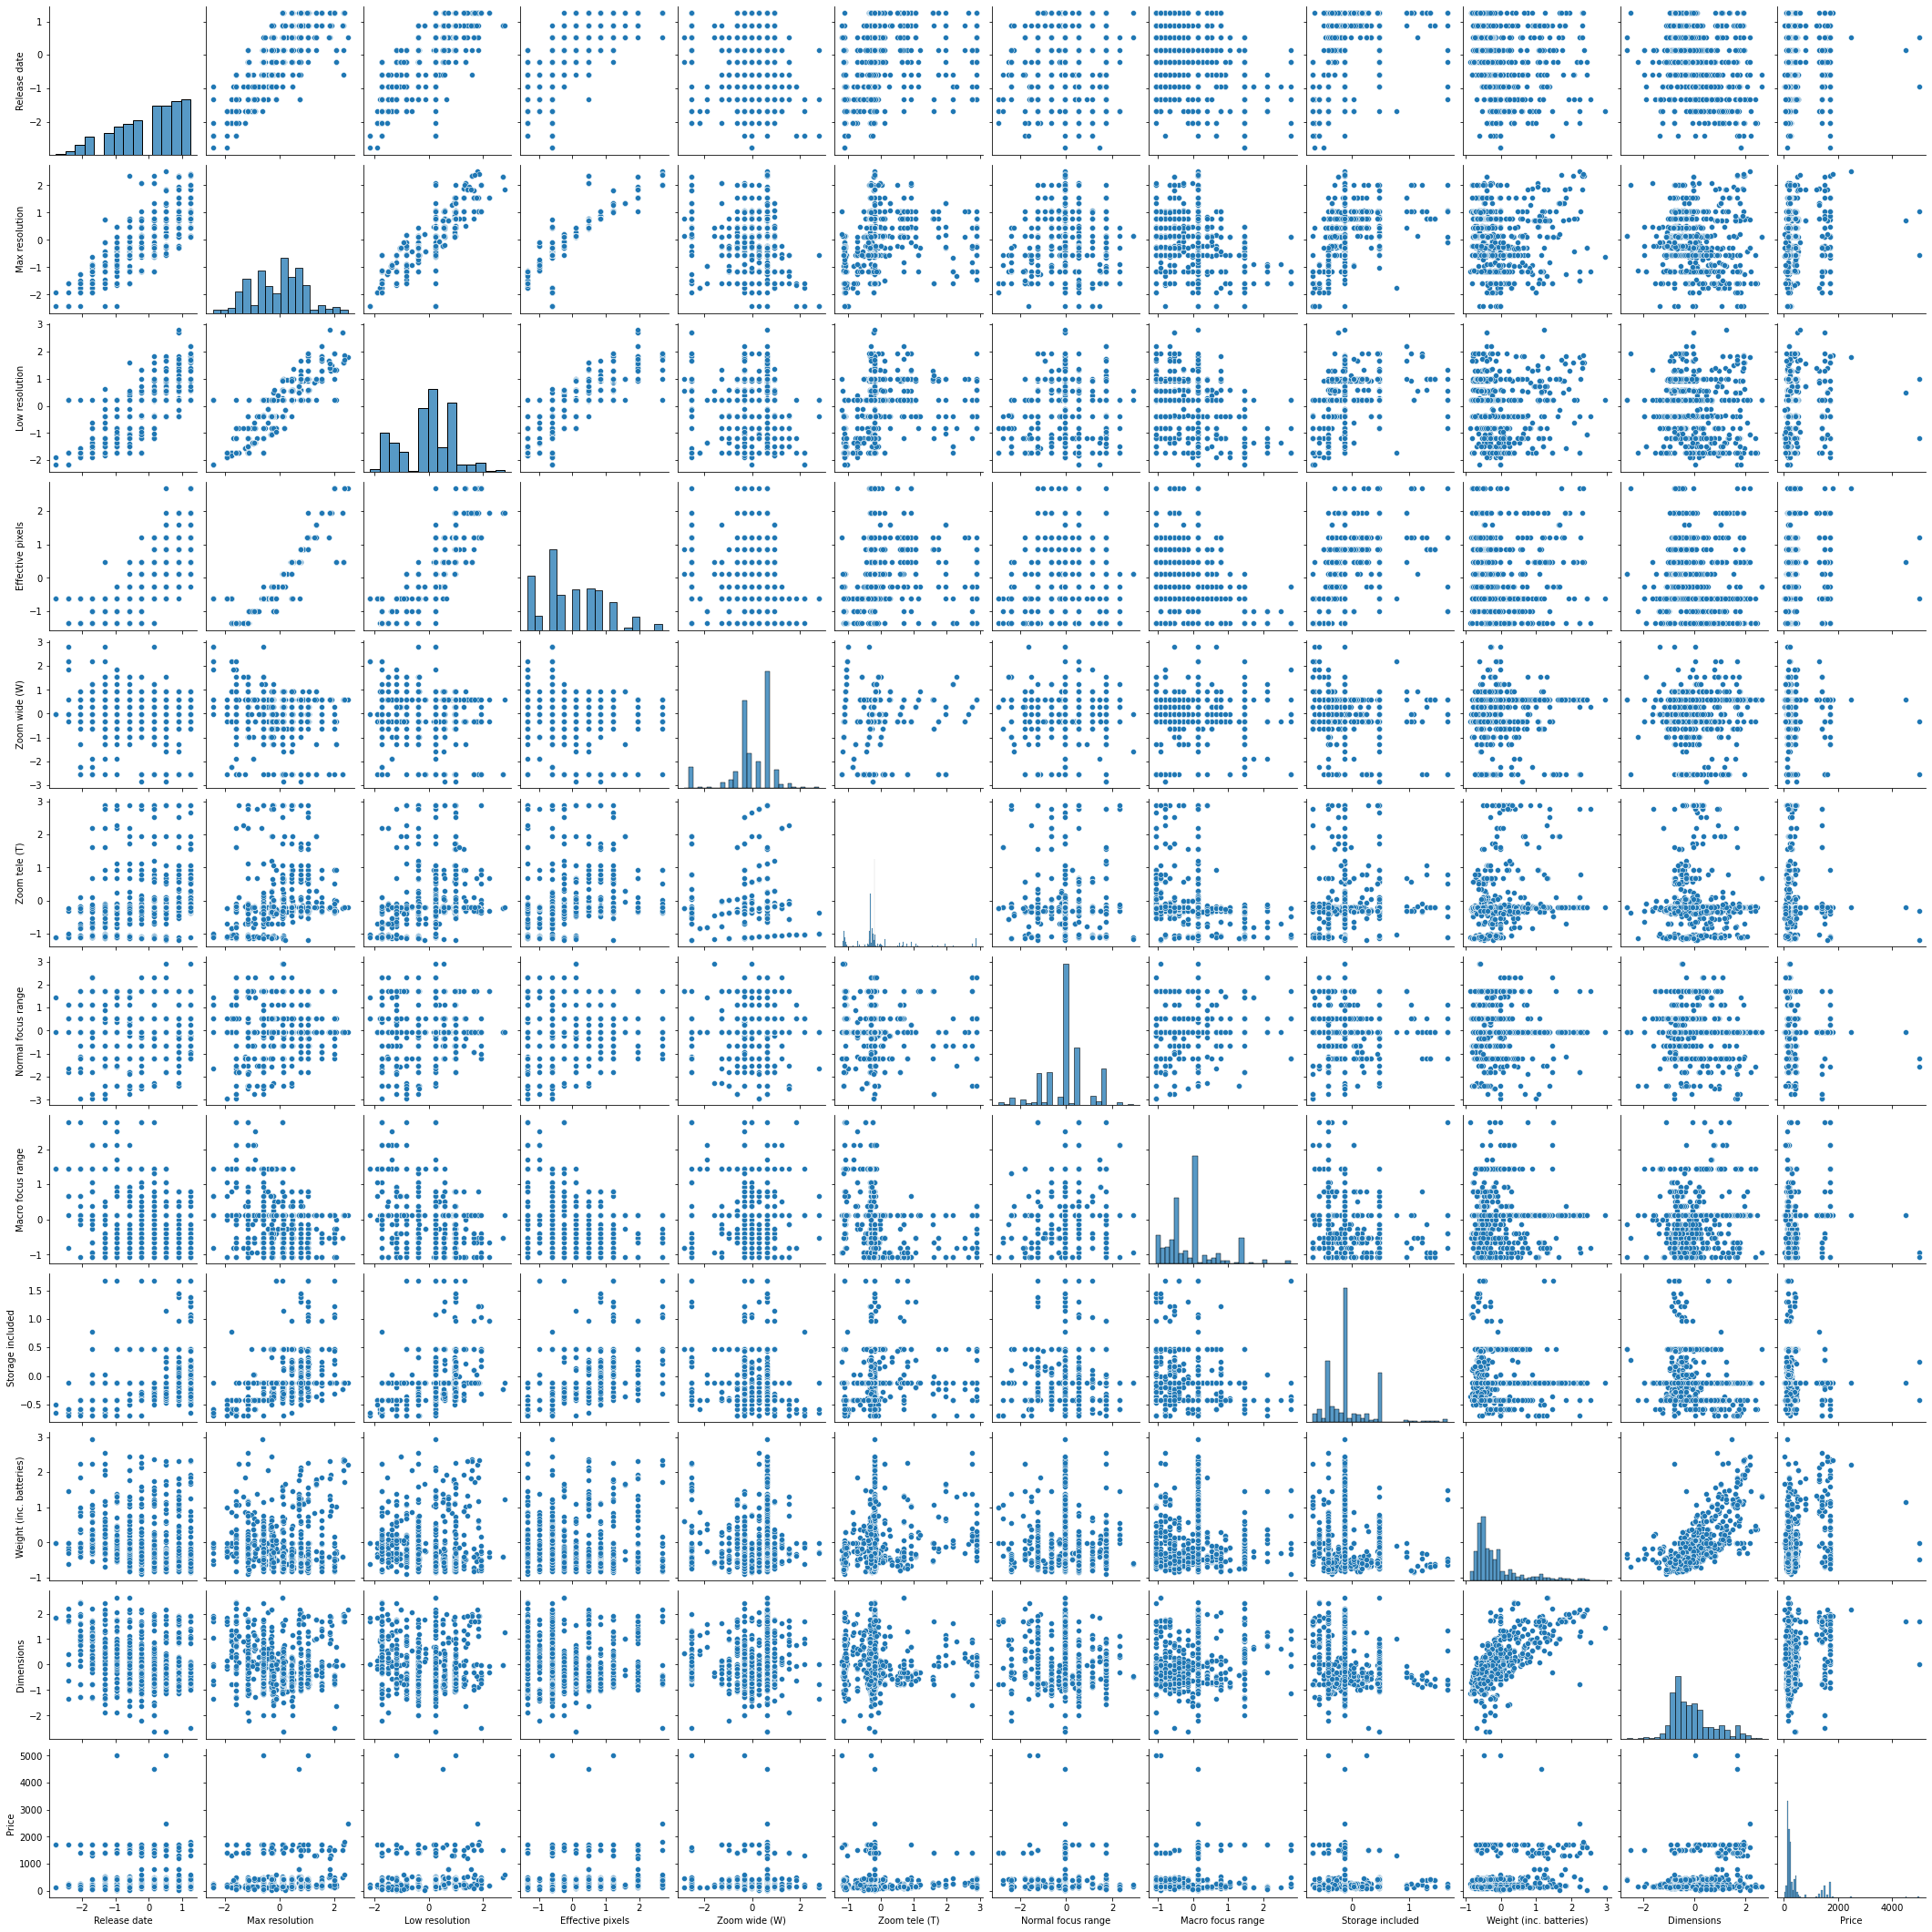

In [12]:
sns.pairplot(dfz)

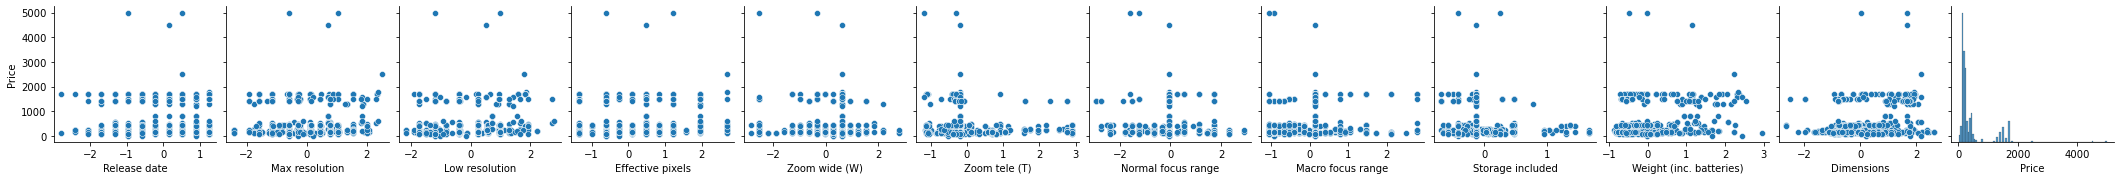

In [13]:
sns.pairplot(dfz,y_vars=['Price'])

<AxesSubplot:>

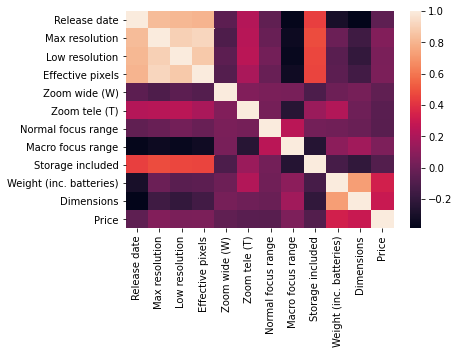

In [14]:
sns.heatmap(dfz.corr())

In [15]:
abs(dfz.corr().loc['Price']).sort_values( ascending=False)

Price                      1.000000
Weight (inc. batteries)    0.331102
Dimensions                 0.298526
Storage included           0.088591
Normal focus range         0.070536
Max resolution             0.067528
Zoom tele (T)              0.066906
Macro focus range          0.055294
Release date               0.050896
Effective pixels           0.047098
Zoom wide (W)              0.045304
Low resolution             0.043952
Name: Price, dtype: float64

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


<p style =" direction:rtl;text-align:right;">
به نظر می رسد متفیرهایی مه با هدف همبستگی بیشتری دارند و در نمودار فوق حالت خطی تری با شیب 1 یا -1 به خود گرفته اند اثر بیشتری روی هدف دارند و در مدل رگرسون خطی هم باید ضرایب بزرگتری داشته باشند.
البته سایز متغیرها هم روی ضریب در رگرسیون خطی برای یک متغیر اثردارند.
    
   همچنین بین سایر متغیرها هم کورلیشن های بالایی دیده می شود که می توان به pca  کاهش ابعاد انجام داد.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### **e)**

In [16]:
X = dfz.drop('Price',axis=1)
y = dfz['Price']

In [17]:
display(X.head(3))
display(y.head(3))


,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions
1,-2.052755,-1.585273,-1.722601,-1.355191,0.606067,-0.195553,-0.044033,0.130477,-0.575169,0.368263,2.454328
2,-1.318390,-2.432424,0.232628,-0.622159,2.810112,-0.995845,-0.044033,0.130477,-0.650153,-0.022429,-0.789342
3,-1.685572,-1.754703,-1.722601,-0.622159,-0.338524,-1.111829,-0.044033,0.130477,-0.575169,-0.022429,-0.789342


1    179.0
2    179.0
3    269.0
Name: Price, dtype: float64

### **f)**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **g)**

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression().fit(X_train, y_train)

### **h)**

In [22]:
print("coef_ : ",lr.coef_)
print("intercept_ : ",lr.intercept_)
cs = pd.Series(index=cols, data=lr.coef_)
cs

coef_ :  [  21.5792398    41.07715316   47.30267702  -27.17849188  -35.40758924
  -91.12880454  -42.74847943   31.37137759 -109.14003097  213.79707214
   82.67853885]
intercept_ :  433.11874195936025


Release date                21.579240
Max resolution              41.077153
Low resolution              47.302677
Effective pixels           -27.178492
Zoom wide (W)              -35.407589
Zoom tele (T)              -91.128805
Normal focus range         -42.748479
Macro focus range           31.371378
Storage included          -109.140031
Weight (inc. batteries)    213.797072
Dimensions                  82.678539
dtype: float64

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


<p style =" direction:rtl;text-align:right;">
اگر مدل رگرسون خطی رابه صورت 
    Y = B0 + B1*X1 + B2*X2 + ...
    در نظر بگیریم B0 همان intercept و coef ها مقادیر B1 ,... هستند.

</p>
<p style =" direction:rtl;text-align:right;">
اگر همه فیچرها را 0 بگذاریم مقدار قیمت برابر intercept می شود.
    
ضریب مثبت نشان می دهد که با افزایش مقدار متغیر مستقل ، میانگین متغیر وابسته نیز تمایل به افزایش دارد. یک ضریب منفی نشان می دهد که با افزایش متغیر مستقل ، متغیر وابسته کاهش می یابد.

مقدار ضریب نشان دهنده این است که میانگین متغیر وابسته با توجه به تغییر یک واحد در متغیر مستقل در حالی که متغیرهای دیگر را در مدل ثابت نگه دارد ، چه مقدار تغییر می کند.
    
همانطور که مشاهده می شود  ترتیب مقادیر کورولیشن ها و ضرایب مدل  و اثز آنها روی متغیر هدف تقریبا مشابه یکدیگر است و تغییراتی که هست بخاطر اثز سایر فیچر ها روی رگرسیون خطی است. 
</p>
<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">



In [23]:
abs(cs).sort_values( ascending=False)

Weight (inc. batteries)    213.797072
Storage included           109.140031
Zoom tele (T)               91.128805
Dimensions                  82.678539
Low resolution              47.302677
Normal focus range          42.748479
Max resolution              41.077153
Zoom wide (W)               35.407589
Macro focus range           31.371378
Effective pixels            27.178492
Release date                21.579240
dtype: float64

In [24]:
abs(dfz.corr().loc['Price']).sort_values( ascending=False)

Price                      1.000000
Weight (inc. batteries)    0.331102
Dimensions                 0.298526
Storage included           0.088591
Normal focus range         0.070536
Max resolution             0.067528
Zoom tele (T)              0.066906
Macro focus range          0.055294
Release date               0.050896
Effective pixels           0.047098
Zoom wide (W)              0.045304
Low resolution             0.043952
Name: Price, dtype: float64